# Solución Radial

El sistema consta de un electrón y un núcleo (protón) con una interacción inversamente proporcional a la distancia entre ellos.

El Hamiltoniano de este sistema contiene la energía cinética del electrón, la energía cinética del núcleo y la interacción coulómbica núcleo-electrón.

$$
H=-\frac{\hbar^2}{2m_N}\nabla^2_N-\frac{\hbar^2}{2m_e}\nabla^2_e-\frac{e^2}{4\pi\varepsilon_0|\vec{r}_N-\vec{r}_e|}
$$

```{margin}
En los `átomos hidrogenoides` consideramos la carga del núcleo, $Ze$, en el término del `potencial` y escribir $\frac{Ze^2}{4\pi\varepsilon_0|\vec{r}_N-\vec{r}_e|}$.
```

```{margin}
Los `átomos hidrogenoides` son aquellos que solo tienen un electrón. Por ejemplo `H`, `He`$^+$, `Li`$^{2+}$, `C`$^{5+}$, `U`$^{91+}$.
```


La ecuación de Schrödinger a resolver es

$$
\left(-\frac{\hbar^2}{2m_N}\nabla^2_N-\frac{\hbar^2}{2m_e}\nabla^2_e-\frac{e^2}{4\pi\varepsilon_0|\vec{r}_N-\vec{r}_e|}\right) \Psi = E \Psi
$$

```{admonition} Inserto matemático: Cambio a sistema de masa reducida
:class: dropdown

El problema se puede simplificar al utilizar coordenadas de masa reducida. La `masa reducida` tiene masa $\mu$ y coordenadas $r$, el `centro de masa` tiene masa $m_T$ y coordenadas $R_{\rm cm}$. Para ver como hacer este cambio, vea {doc}`Rotor`.

La nueva ecuación de Schrödinger es

$$
\left(-\frac{\hbar^2}{2m_T}\nabla^2_{\cm cm}-\frac{\hbar^2}{2\mu}\nabla^2_{\mu}-\frac{e^2}{4\pi\varepsilon_0r}\right) \Psi = E \Psi
$$

La eigenfunción $\Psi$ de la ecuación anterior depende de las coordenadas del centro de masa, $R_{\rm cm}$ y de las coordenadas de la masa reducida, $r$. Se propone una solución por separación de variables, tal que $\Psi(R,r) = \Phi(R_{\rm cm}) \psi(r)$. Al sustituir en la ecuación de Schrodinger se obtienen 2 ecuaciones

$$
\left(-\frac{\hbar^2}{2m_T}\nabla^2_{cm}\right) \Phi = E_{cm} \Phi
$$

$$
\left(-\frac{\hbar^2}{2\mu}\nabla^2_{\mu}-\frac{e^2}{4\pi\varepsilon_0r}\right) \psi = E \psi
$$

La primera ecuación corresponde al movimiento de una partícula libre.

Para resolver la segunda ecuación cambiamos a coordenadas esféricas, recordando que (vea {doc}`Esfera`)

$$
\nabla^2_{\mu}=\left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2} \right) = \left( \frac{1}{r} \frac{\partial^2}{\partial r^2} r + \frac{1}{r^2} \Lambda^2 \right) 
$$

Entonces

$$
\left(-\frac{\hbar^2}{2\mu} \frac{1}{r} \frac{\partial^2}{\partial r^2} r -\frac{\hbar^2}{2\mu} \frac{1}{r^2} \Lambda^2 -\frac{e^2}{4\pi\varepsilon_0r}\right) \psi = E \psi
$$
```

```{admonition} Inserto matemático: Separación de variables
:class: dropdown

Se propone que la eigenfunción $\psi$ puede ser separada en una parte radial y una parte angular, es decir

$$
\psi=R(r)Y(\theta,\phi)
$$

Esto genera una ecuación a resolver para la parte radial (y una para la parte angular que trataremos posteriormente)

$$
-\frac{\hbar^2}{2\mu} \frac{1}{r} \frac{d^2(rR)}{dr^2} - \left[ \frac{e^2}{4\pi\varepsilon_0r} -\frac{l(l+1)\hbar^2}{2\mu r^2} \right] R = ER 
$$
```

Las soluciones a la ecuación radial son

$$
R_{n,l}(r) = -N_{n,l} \left( \frac{2r}{na_0} \right)^l e^{-r/na_0} L_{n+l}^{2l+1} \left( \frac{2r}{n a_0} \right)
$$

aquí han surgido los números cuánticos

```{margin}
$n$ es el `número cuántico principal`.
```
$$
n=1,2,3,...
$$

```{margin}
$l$ es el `número cuántico azimutal` o `momento angular`.
```
$$
l=0,...,n-1
$$

$N_{n,l}$ toma la forma

$$
N_{n,l} = \left( \frac{2}{na_0} \right)^{3/2} \sqrt{\frac{(n-l-1)!}{2n[(n+l)!]^3}}
$$

$L_{n+l}^{2l+1}$ son los polinomios asociados de Laguerre

```{admonition} Inserto matemático: Polinomios de Laguerre
:class: dropdown

$$
L_{k}^N (r) = \frac{d^N}{dr^N} L_k(r)
$$

$$
L_{k} (r) = e^r \frac{d^k}{dr^k} \left(r^k e^{-r}\right)
$$
```

**Importe las siguientes librerías**

- pyplot de matplotlib
- numpy
- derivative de scipy.misc
- laguerre de scipy.special

In [1]:
# Librerías

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.misc import derivative
from scipy.special import laguerre

**Defina una función que reciba valores de $n$ y $l$ y regresen la función $R(r)$**

In [3]:
# def R(r)

In [4]:
def R_func(r,n,l):
    N = (2/(n*a0))**(3/2)*np.sqrt((np.math.factorial(n-l-1))/(2*n*((np.math.factorial(n+l)))**3))
    L = laguerre(n+l)
    L = L/np.abs(L[n+l])
    assoc_L = derivative(L,2*r/(n*a0),n=2*l+1,order=2*l+3)
    R = -N*(2*r/(n*a0))**l*np.exp(-r/(n*a0))*assoc_L
    
    return R

**Grafique el cuadrado de la función de densidad de probabilidad del orbital 1s, $R^2_{n=1,l=0}$, y su función de distribución radial $r^2R^2_{n=1,l=0}$**

In [5]:
# Gráfica

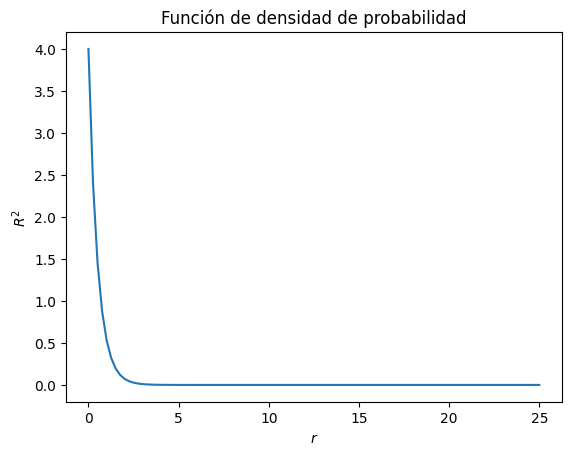

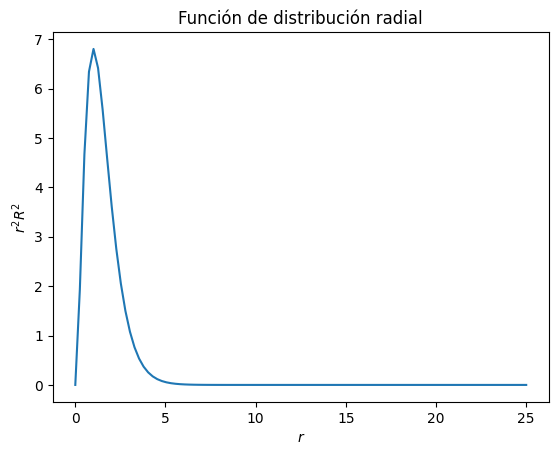

In [6]:
r=np.linspace(0,25,100)

a0=1.0

n = 1
l = 0

R = R_func(r,n,l)

plt.plot(r,R**2,label=n)
plt.xlabel("$r$")
plt.ylabel("$R^2$")
plt.title("Función de densidad de probabilidad")
plt.show()

plt.plot(r,4*np.pi*r**2*R**2,label=n)
plt.xlabel("$r$")
plt.ylabel("$r^2R^2$")
plt.title("Función de distribución radial")
plt.show()

**Realice la gráfica de $R^2(r)$ (el cuadrado de la parte radial de la eigenfunción) para los orbitales 1s ($n=1$, $l=0$),2s ($n=2$, $l=0$),3s ($n=3$, $l=0$) y 4s ($n=4$, $l=0$), y de $r^2R^2$.**

In [7]:
# Gráfica

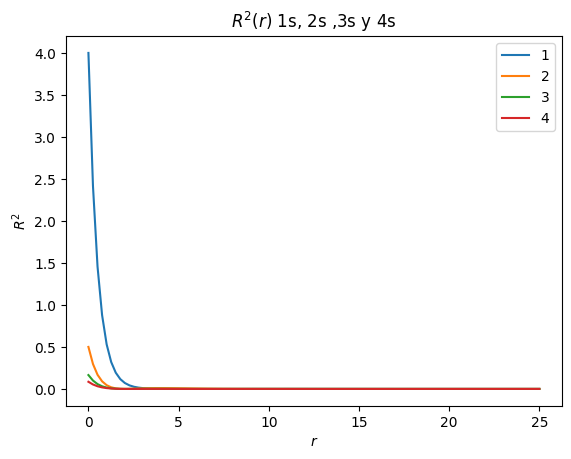

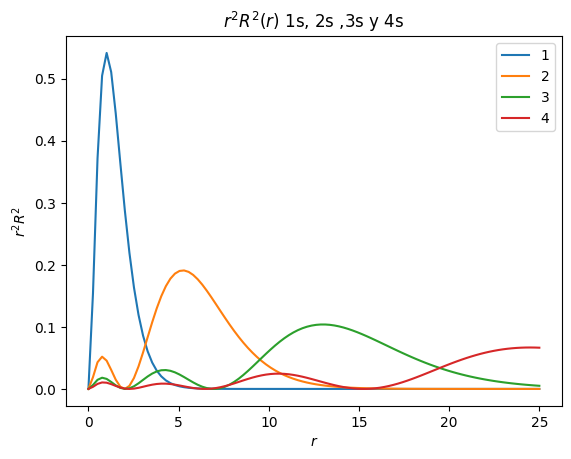

In [8]:
#Cambiar aqui para ajustar limites del eje X
r=np.linspace(0,25,100)

#Cambiar aqui para usar s,p,d,etc
l=0
#Cambiar aquí para elegir limites de los numeros cuanticos n
n_min=1
n_max=4

for n in range(n_min,n_max+1):
    R = R_func(r,n,l)
    plt.plot(r,R**2,label=n)

plt.legend()
#Cambiar aqui los titulos de los ejes
plt.xlabel("$r$")
plt.ylabel("$R^2$")
plt.title("$R^2(r)$ 1s, 2s ,3s y 4s")
plt.show()

for n in range(n_min,n_max+1):
    R = R_func(r,n,l)
    plt.plot(r,r**2*R**2,label=n)

plt.legend()
#Cambiar aqui los titulos de los ejes
plt.xlabel("$r$")
plt.ylabel("$r^2R^2$")
plt.title("$r^2R^2(r)$ 1s, 2s ,3s y 4s")
plt.show()

In [9]:
from OptMultiple import MultipleChoice

In [10]:
question = "¿Cuántos máximos tiene el cuadrado de la parte radial del orbital 1s?"
answers = [
    "Uno",
    "Dos",
    "Tres",
    "Diverge en cero"
]
explanation = (
    "La parte radial de la eigenfunción es \(R_{n=1,l=0}^2(r)\)."
)
MultipleChoice(
    question, answers, correct_answer=3, explanation=explanation
)

In [11]:
question = "¿Cuántos máximos tiene el cuadrado de la parte radial del orbital 2s?"
answers = [
    "Uno",
    "Dos",
    "Tres",
    "Diverge en cero"
]
explanation = (
    "La parte radial de la eigenfunción es \(R_{n=2,l=0}^2(r)\)."
)
MultipleChoice(
    question, answers, correct_answer=3, explanation=explanation
)

In [12]:
question = "¿Cuántos máximos tiene el cuadrado de la parte radial del orbital 3s?"
answers = [
    "Uno",
    "Dos",
    "Tres",
    "Diverge en cero"
]
explanation = (
    "La parte radial de la eigenfunción es \(R_{n=3,l=0}^2(r)\)."
)
MultipleChoice(
    question, answers, correct_answer=3, explanation=explanation
)

In [13]:
question = "¿Cuántos máximos tiene el cuadrado de la función de distribución radial del orbital 1s?"
answers = [
    "Uno",
    "Dos",
    "Tres",
    "Diverge en cero"
]
explanation = (
    "La función de distribución radial de la eigenfunción es \(r^2 R_{n=1,l=0}^2(r)\)."
)
MultipleChoice(
    question, answers, correct_answer=0, explanation=explanation
)

In [14]:
question = "¿Cuántos máximos tiene el cuadrado de la función de distribución radial del orbital 2s?"
answers = [
    "Uno",
    "Dos",
    "Tres",
    "Diverge en cero"
]
explanation = (
    "La función de distribución radial de la eigenfunción es \(r^2 R_{n=2,l=0}^2(r)\)."
)
MultipleChoice(
    question, answers, correct_answer=1, explanation=explanation
)

In [15]:
question = "¿Cuántos máximos tiene el cuadrado de la función de distribución radial del orbital 3s?"
answers = [
    "Uno",
    "Dos",
    "Tres",
    "Diverge en cero"
]
explanation = (
    "La función de distribución radial de la eigenfunción es \(r^2 R_{n=3,l=0}^2(r)\)."
)
MultipleChoice(
    question, answers, correct_answer=2, explanation=explanation
)

```{admonition} Pregunta
:class: note

¿Encuentra algún patrón entre el número de máximos de la función de distribución radial con el número cuántico $n$ del orbital?
```

**Realice la gráfica del cuadrado de la parte radial de la eigenfunción para los orbitales 3s ($n=3$, $l=0$),3p ($n=3$, $l=1$) y 3d ($n=3$, $l=2$), y de $r^2R^2$.**

In [16]:
# Gráfica

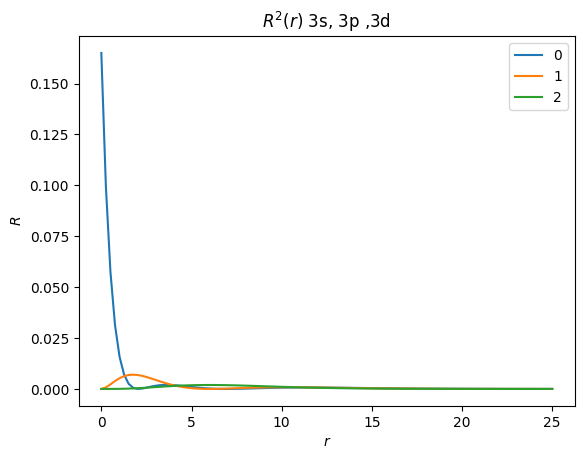

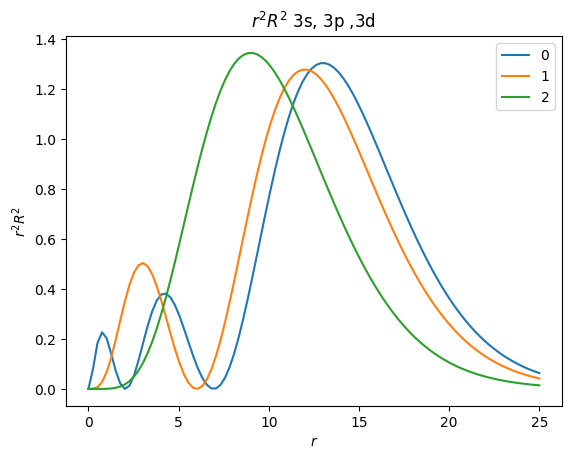

In [17]:
#Cambiar aqui para ajustar eje X
r=np.linspace(0,25,100)

a0=1.0

#Cambiar aqui para elegir n
n=3
#Cambiar aquí para elegir numeros cuanticos l
lmin=0
lmax=2

for l in range(lmin,lmax+1):
    R = R_func(r,n,l)
    plt.plot(r,R**2,label=l)

plt.legend()
#Cambiar aqui los titulos de los ejes
plt.xlabel("$r$")
plt.ylabel("$R$")
plt.title("$R^2(r)$ 3s, 3p ,3d")
plt.show()

for l in range(lmin,lmax+1):
    R = R_func(r,n,l)
    plt.plot(r,4*np.pi*r**2.0*R**2.0,label=l)

plt.legend()
#Cambiar aqui los titulos de los ejes
plt.xlabel("$r$")
plt.ylabel("$r^2R^2$")
plt.title("$r^2R^2$ 3s, 3p ,3d")
plt.show()

In [18]:
question = "¿Cuál de los orbitales (3s/3p/3d) tiene el máximo del cuadrado de la parte radial más cerca del origen? Es decir, ¿Cuál de estos orbitales (3s/3p/3d) es más penetrante?"
answers = [
    "3s",
    "3p",
    "3d"
]
explanation = (
    "El cuadrado de la parte radial del 3s diverge en cero. Note que el máximo de la función de distribución radial de 3d es más cercano al origen."
)
MultipleChoice(
    question, answers, correct_answer=0, explanation=explanation
)

## Referencias

- P. W. Atkins, y R. Friedman, Molecular Quantum Mechanics (Oxford University Press, 2005).
- F.L. Pilar, Elementary Quantum Chemistry (Dover ed., 2001).
- I.N. Levine, D.H. Busch, y H. Shull, Quantum chemistry (Pearson Prentice Hall Upper Saddle River, NJ, 2009).
- D.A. McQuarrie y J.D. Simon, Physical Chemistry: A Molecular Approach (University Science Books, 1997).